# Iterative Imputation

In [2]:
import pandas as pd
mydata = pd.read_excel("Dataset/salary.xlsx")
mydata

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,NaN,15.0,25.0
4,161.0,NaN,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,NaN,7.0,NaN
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [3]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


In [4]:
lg = LinearRegression()
imp = IterativeImputer(estimator=lg,missing_values=np.nan, max_iter=5,verbose=2,imputation_order="roman")
ImputedData = imp.fit_transform(mydata)

[IterativeImputer] Completing matrix with shape (10, 3)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.02
[IterativeImputer] Change: 22.357247084462237, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.04
[IterativeImputer] Change: 5.450471508828429, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 3/5, elapsed time 0.05
[IterativeImputer] Change: 1.9959603940512807, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 4/5, elapsed time 0.06
[IterativeImputer] Change: 0.3486270765418453, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 5/5, elapsed time 0.06
[IterativeImputer] Change: 0.06542726935151677, scaled tolerance: 0.18 
[IterativeImputer] Early stopping criterion reached.


In [6]:
pd.DataFrame(ImputedData, columns=["Height", "YOE", "Salary"])

,Height,YOE,Salary
0,175.000000,3.000000,6.00000
1,168.000000,4.000000,9.00000
2,160.000000,10.000000,18.00000
3,164.716065,15.000000,25.00000
4,161.000000,31.848964,50.00000
5,162.000000,5.000000,10.00000
6,180.000000,6.000000,11.00000
7,169.325576,7.000000,12.37321
8,172.000000,8.000000,12.00000
9,170.000000,9.000000,14.00000


- observation:
    1. Not giving desirable information
    2. YOE is 31year seen off

- Problems : 
    

# Exploring MICE (Multiple Imputation by Chained Equation)

In [8]:
#! pip install miceforest

In [10]:
import miceforest as mf
mydata = pd.read_excel("Dataset/salary.xlsx")
kds = mf.ImputationKernel(mydata,datasets=5,save_all_iterations=True)

In [13]:
#Run Mice Algo for 6 time
kds.mice(6)

In [14]:
kds.complete_data(0)

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,160.0,15.0,25.0
4,161.0,7.0,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,180.0,7.0,14.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [15]:
kds.complete_data(2)

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,168.0,15.0,25.0
4,161.0,6.0,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,168.0,7.0,25.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [22]:
finalResult = pd.concat([kds.complete_data(i) for i in range(5)]).groupby(level=0).mean()
finalResult

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,164.8,15.0,25.0
4,161.0,8.2,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,172.0,7.0,15.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


# Model Base Imputer -KNN

In [23]:
from sklearn.impute import KNNImputer
mydata = pd.read_excel("Dataset/salary.xlsx")
knn = KNNImputer(n_neighbors=2)

In [25]:
pd.DataFrame(knn.fit_transform(mydata))

,0,1,2
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,165.0,15.0,25.0
4,161.0,12.5,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,176.0,7.0,11.5
8,172.0,8.0,12.0
9,170.0,9.0,14.0


# Model Base Imputation - RandomForest

In [38]:
#! pip install missingpy

In [39]:
from missingpy import MissForest
imputer = MissForest()

ModuleNotFoundError: No module named 'sklearn.neighbors.base'

# Mean mode median - simple imputer

In [46]:
mydata

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,NaN,15.0,25.0
4,161.0,NaN,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,NaN,7.0,NaN
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [44]:
from sklearn.impute import SimpleImputer

# For Mean
mydata = pd.read_excel("Dataset/salary.xlsx")
si = SimpleImputer(strategy='mean')
pd.DataFrame(si.fit_transform(mydata))

,0,1,2
0,175.0,3.000000,6.000000
1,168.0,4.000000,9.000000
2,160.0,10.000000,18.000000
3,168.5,15.000000,25.000000
4,161.0,7.444444,50.000000
5,162.0,5.000000,10.000000
6,180.0,6.000000,11.000000
7,168.5,7.000000,17.222222
8,172.0,8.000000,12.000000
9,170.0,9.000000,14.000000


In [43]:
# For Mode
mydata = pd.read_excel("Dataset/salary.xlsx")
si = SimpleImputer(strategy='most_frequent')
pd.DataFrame(si.fit_transform(mydata))

,0,1,2
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,160.0,15.0,25.0
4,161.0,3.0,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,160.0,7.0,6.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [45]:
# For Median
mydata = pd.read_excel("Dataset/salary.xlsx")
si = SimpleImputer(strategy='median')
pd.DataFrame(si.fit_transform(mydata))

,0,1,2
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,169.0,15.0,25.0
4,161.0,7.0,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,169.0,7.0,12.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [47]:
import missingno as msg


<AxesSubplot:>

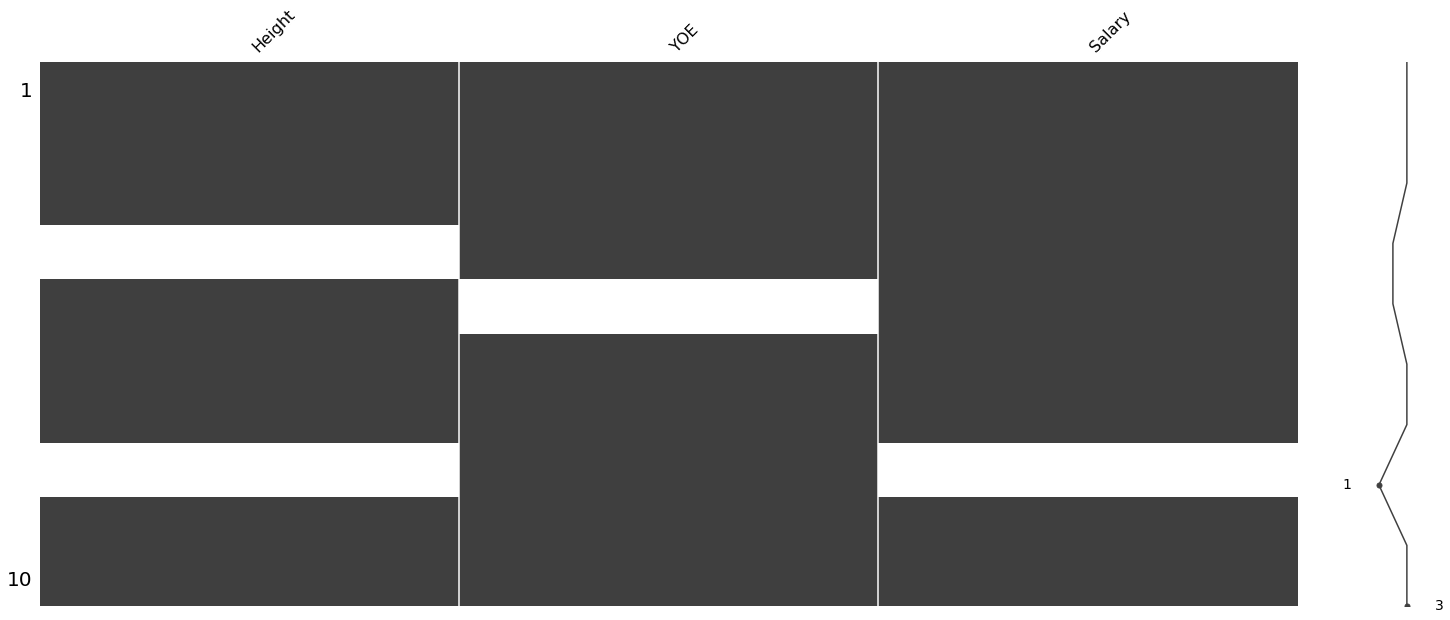

In [49]:
msg.matrix(mydata)